# EDA

# Scenario
You are working as an analyst with this internet service provider. You are provided with this historical data about your company's customers and their churn trends. Your task is to build a machine learning model that will help the company identify customers that are more likely to default/churn and thus prevent losses from such customers.

In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.gridspec as gs
import seaborn as sns
from eda_module import *
import warnings
warnings.filterwarnings('ignore')

%matplotlib inline
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [14]:
data = pd.read_csv('DATA_Customer-Churn.csv')
df = data.copy()

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   OnlineSecurity    7043 non-null   object 
 7   OnlineBackup      7043 non-null   object 
 8   DeviceProtection  7043 non-null   object 
 9   TechSupport       7043 non-null   object 
 10  StreamingTV       7043 non-null   object 
 11  StreamingMovies   7043 non-null   object 
 12  Contract          7043 non-null   object 
 13  MonthlyCharges    7043 non-null   float64
 14  TotalCharges      7043 non-null   object 
 15  Churn             7043 non-null   object 
dtypes: float64(1), int64(2), object(13)
memory

In [16]:
df.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No,Yes,No,No,No,No,Month-to-month,29.85,29.85,No
1,Male,0,No,No,34,Yes,Yes,No,Yes,No,No,No,One year,56.95,1889.5,No
2,Male,0,No,No,2,Yes,Yes,Yes,No,No,No,No,Month-to-month,53.85,108.15,Yes
3,Male,0,No,No,45,No,Yes,No,Yes,Yes,No,No,One year,42.30,1840.75,No
4,Female,0,No,No,2,Yes,No,No,No,No,No,No,Month-to-month,70.70,151.65,Yes


In [17]:
# make all column names lowercase
df.columns = map(str.lower, df.columns)
df.columns

Index(['gender', 'seniorcitizen', 'partner', 'dependents', 'tenure',
       'phoneservice', 'onlinesecurity', 'onlinebackup', 'deviceprotection',
       'techsupport', 'streamingtv', 'streamingmovies', 'contract',
       'monthlycharges', 'totalcharges', 'churn'],
      dtype='object')

In [18]:
#Print number of rows in DF
print(f"Rows: {df.shape[0]} \n")
#Print number of features in DF
print(f"Features: {df.shape[1]} \n")
#Print total number of missing values
print(f"Missing Values: {df.isnull().values.sum()} \n")
#Print number of unique values per feature location
print(f"Unique Values: {df.nunique()} \n")

Rows: 7043 

Features: 16 

Missing Values: 0 

Unique Values: gender                 2
seniorcitizen          2
partner                2
dependents             2
tenure                73
phoneservice           2
onlinesecurity         3
onlinebackup           3
deviceprotection       3
techsupport            3
streamingtv            3
streamingmovies        3
contract               3
monthlycharges      1585
totalcharges        6531
churn                  2
dtype: int64 



# Our Data

We have 7043 rows (each representing a unique customer) with 16 columns, 1 target feature (Churn)

### Target:
- Churn (binary)

### Nominal Features:
- Tenure
- MonthlyCharges
- TotalCharges

### Categorical Features:

- The rest 

# 1. General EDA

## 1.1 Target: Churn

In [19]:
# Replace all missing string values with 0
df.totalcharges = df.totalcharges.replace(" ", 0)
# Change totalcharges type from string to float
df.totalcharges = df.totalcharges.astype('float32')
df.to_csv('reg_data.csv')

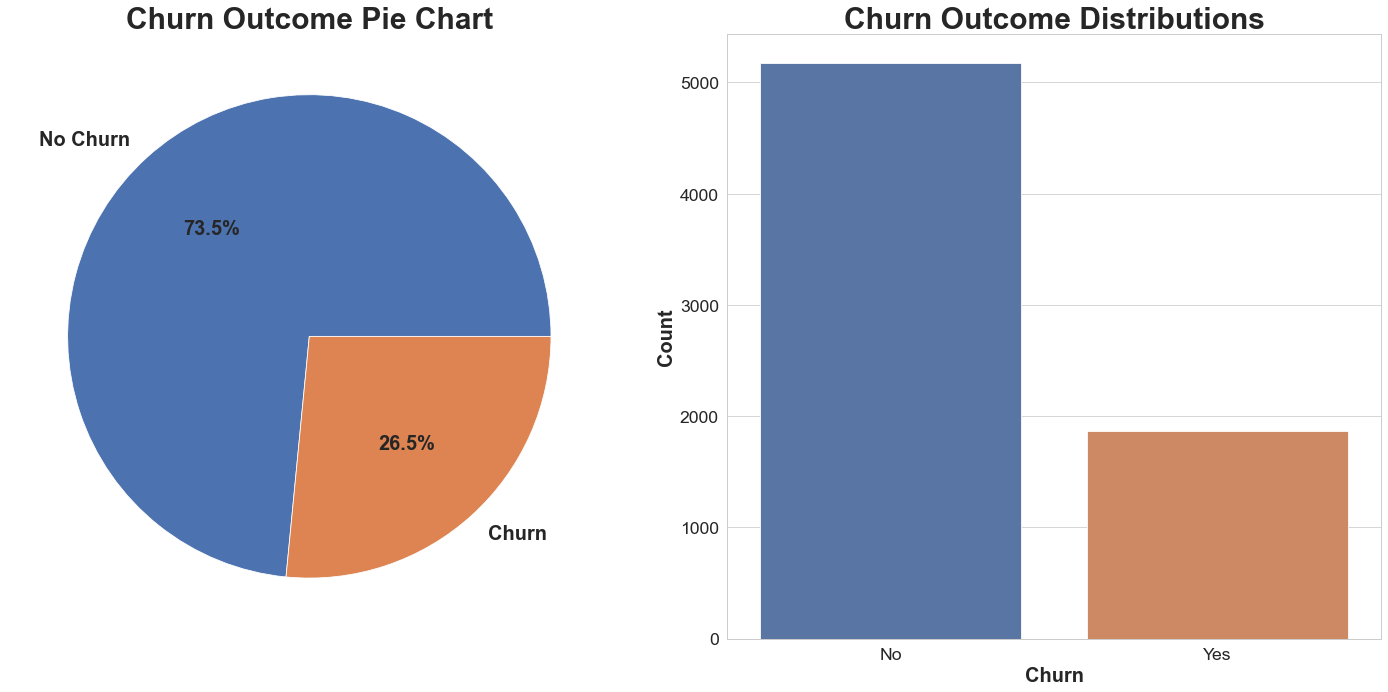

In [20]:
plot_target_dist(df)

# 2. Numerical Feature EDA

## 2.1 Kernel Density Estimations - Tenure, Monthly Charges, Total Charges

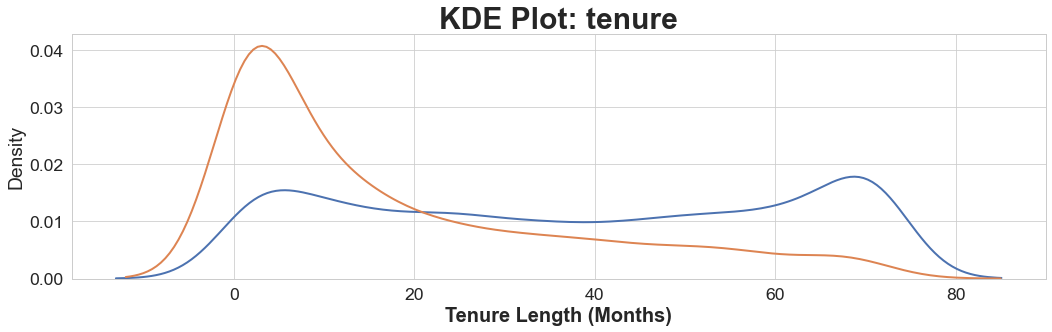

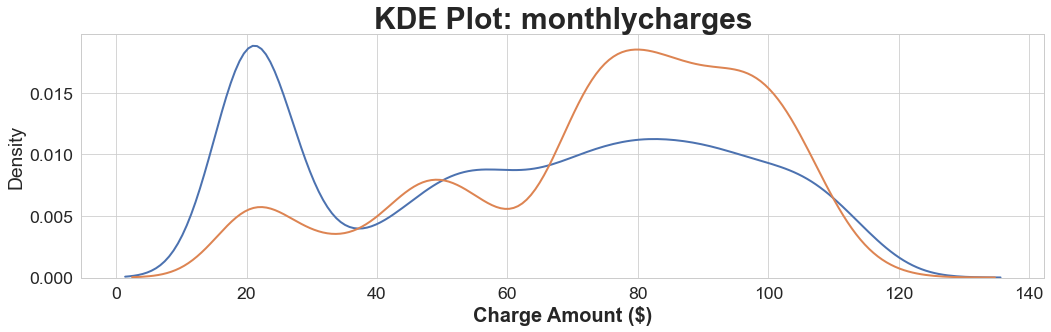

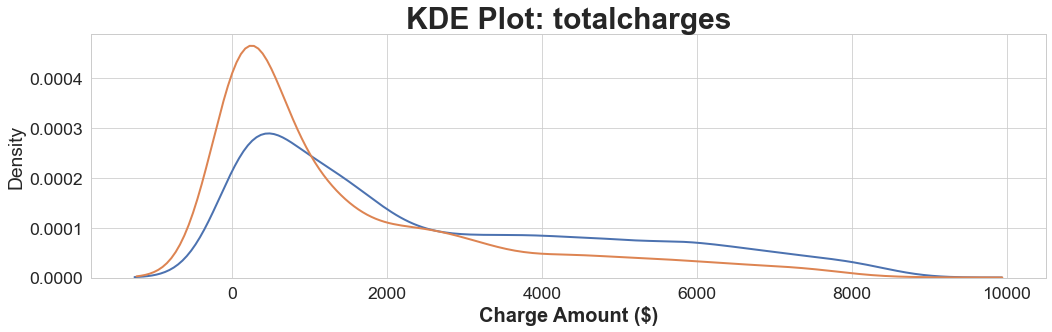

In [21]:
plot_kde(df, 'tenure')
plot_kde(df, 'monthlycharges')
plot_kde(df, 'totalcharges')

### 2.2 Grouping Tenure

In [24]:
df['grouped_tenure'] = df.apply(lambda df: tenure_groups(df), axis = 1)

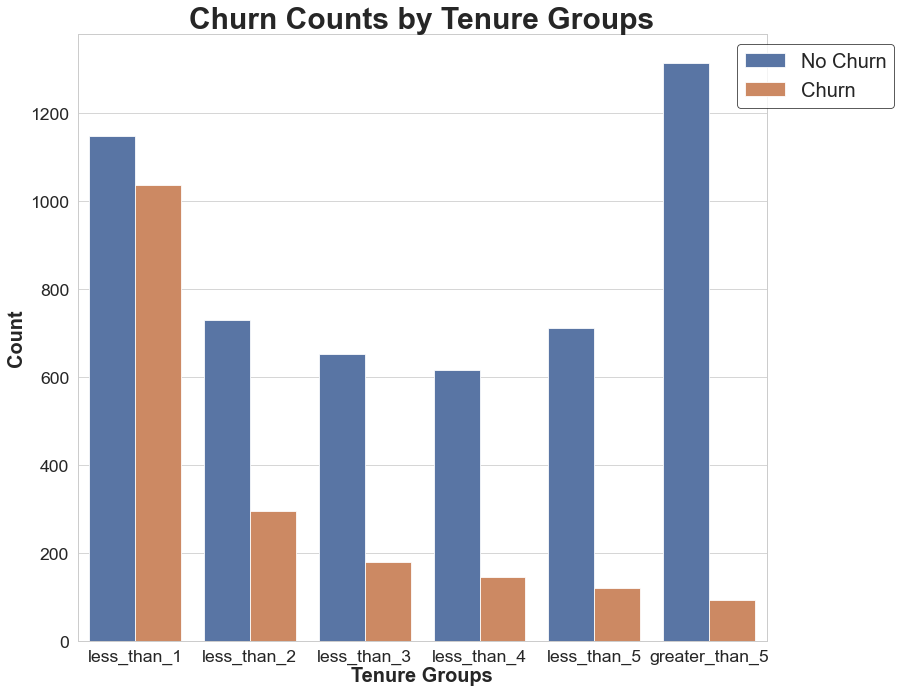

In [25]:
tenure_group_counts(df)

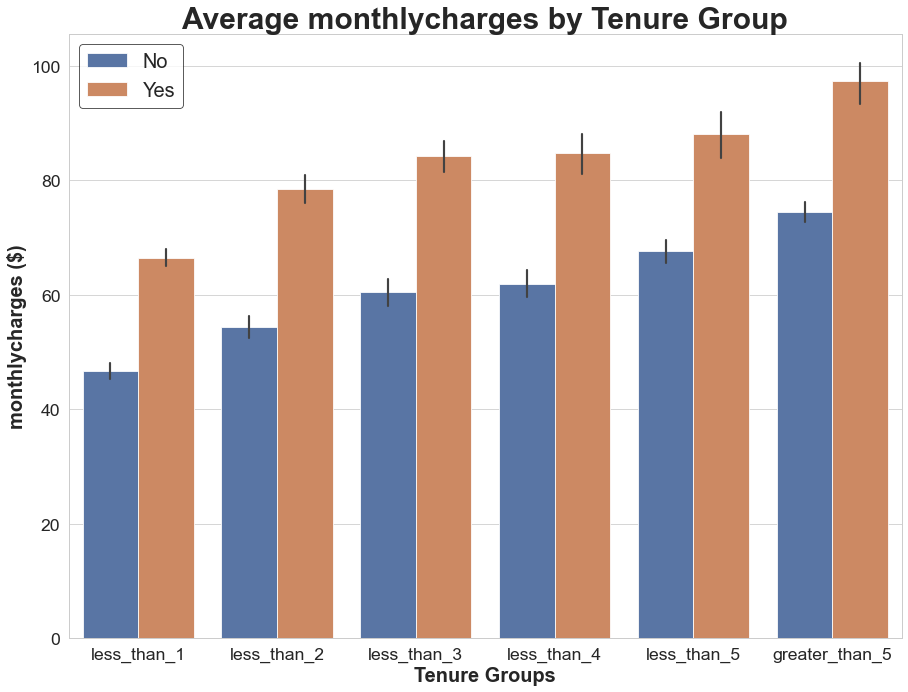

In [26]:
plot_numerical_averages(df, 'monthlycharges')

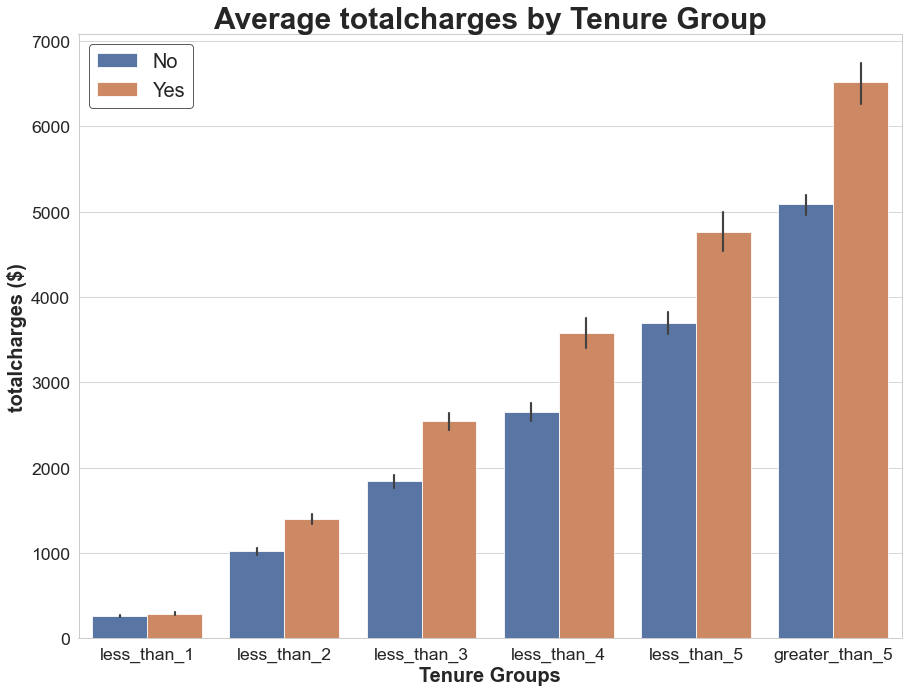

In [27]:
plot_numerical_averages(df, 'totalcharges')

### Numeric Variable Conclusions:

- Tenure: Customers with lower service tenures (newer clients) have a higher probability of churning than those with long tenures.
- Monthly Charges: Generally speaking, Likelihood of a customer churning increases as charges increase, and customers have the highest probability of churning when their monthly charges exceed 60 dollars. Customers who do not churn are most likely to have bills around 20 dollars, followed by just over 80 dollars.
- Total Charges: Distributions mostly too general for impact of feature (Monthly is most likely more important)

# 3. Categorical Features

### 3.1 Gender

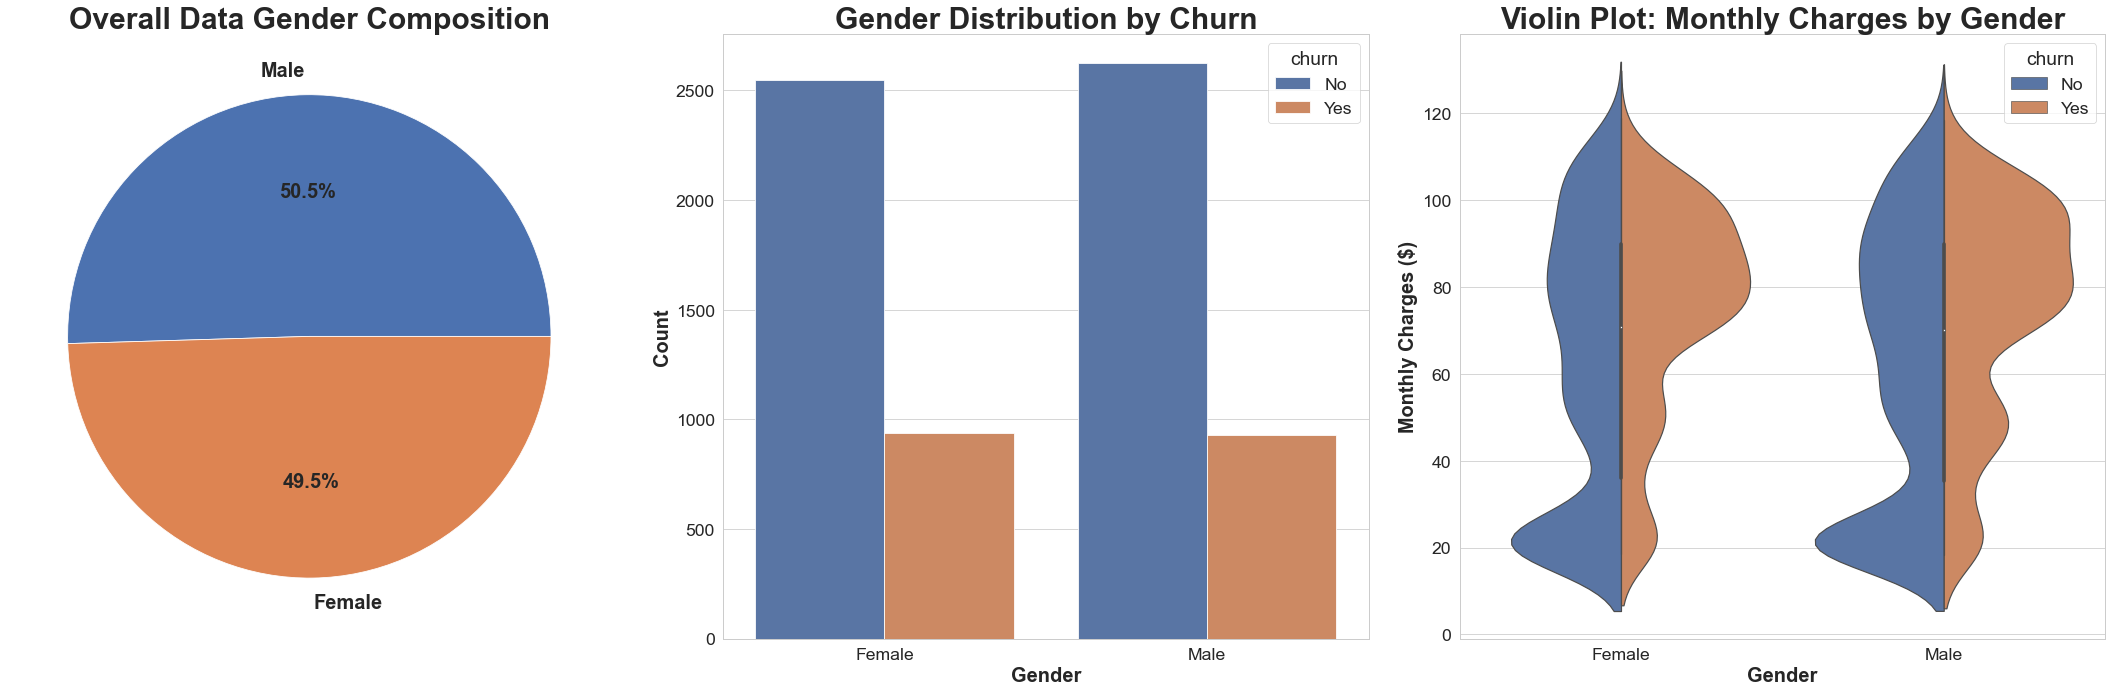

In [28]:
plot_gender_dist(df)

Gender Conclusion: Gender is equivalent in representation in our dataset and does not appear to be an indicator of Churn

### 3.2 Age

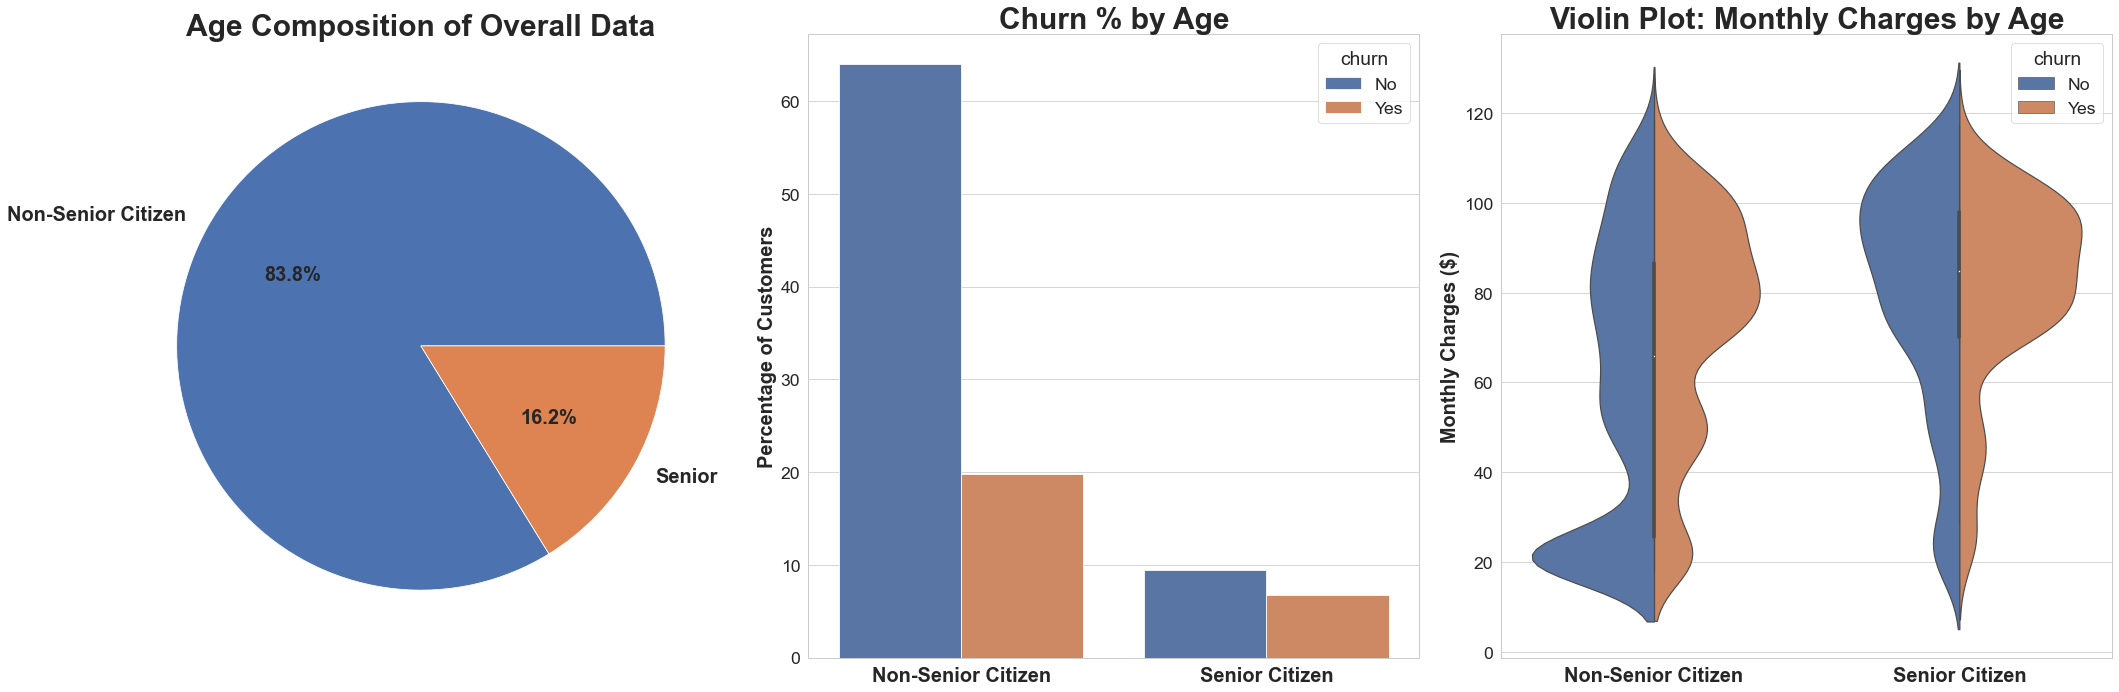

In [29]:
plot_age_dist(df)

Age Conclusion:

- Our dataset has significantly less senior citizens than non-seniors (only 16% are senior)
- Overall, more non-senior citizens churn than senior citizens
- A higher proportion of senior citizens churn than non-senior citizens

### 3.3 Partner & Dependents

In [30]:
df[df.churn == 'Yes'].partner.value_counts()

No     1200
Yes     669
Name: partner, dtype: int64

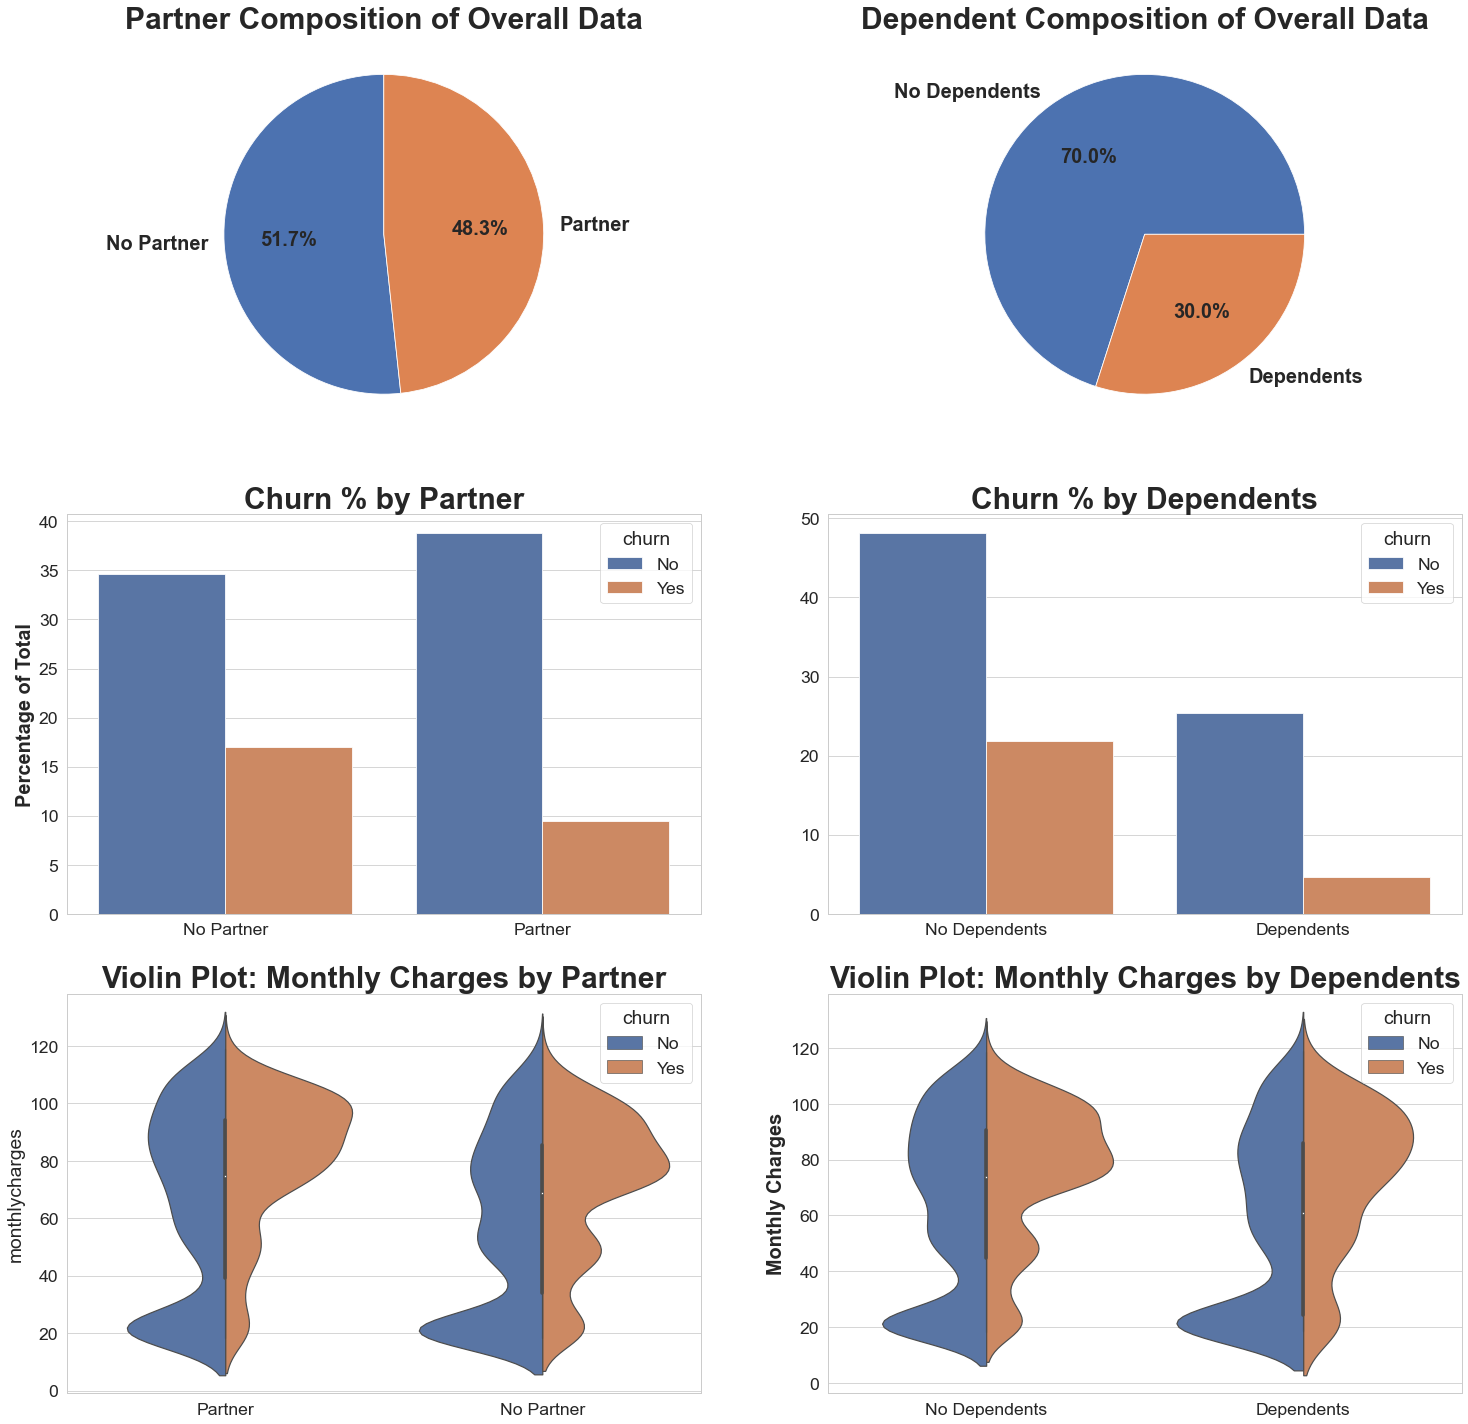

In [31]:
plot_partner_dependents(df)

Partner/Dependent Conclusions:

- Overall, those without partners are more likely to churn than those with partners
- Customers without dependents are more likely to churn than those with dependents

### 3.4 Contracts

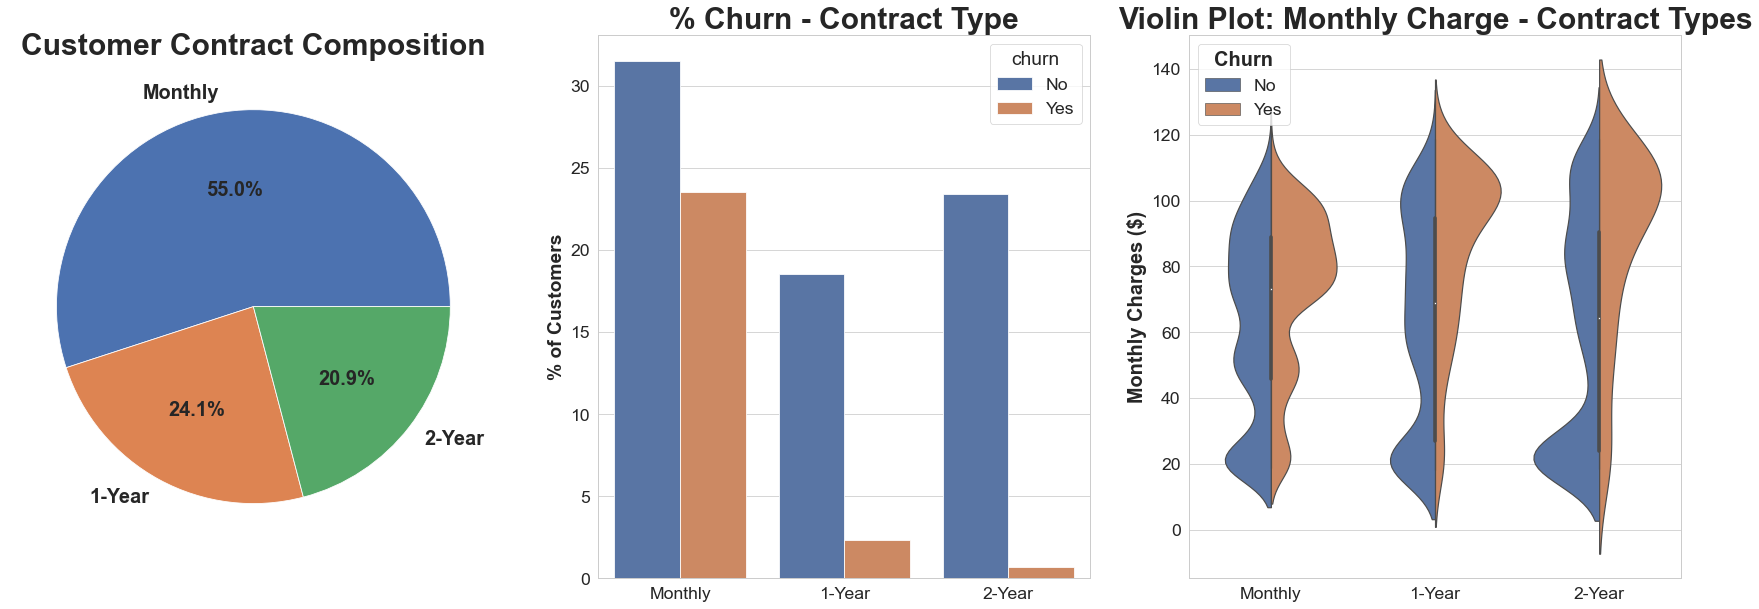

In [35]:
plot_contracts(df)

Contract Conclusion:

- More than half of customers use a monthly payment option
- Significantly more customers churn on monthly plans
- The longer the plan, the lower the churn rate
- Monthly charges are generally higher the longer the contract is